# VES Experiments for 1D Bayesian Optimization

In [1]:
from ves import *
import matplotlib.pyplot as plt
import numpy as np
import torch

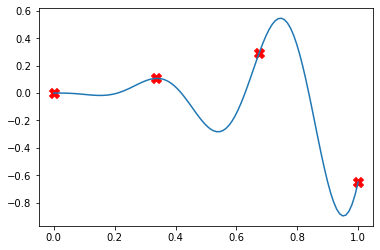

In [6]:
train_X = torch.rand(4, 1, dtype=torch.double)
train_X[0, 0] = 0.0
train_X[3, 0] = 1.0 # Make sure the boundary is observed
def f(X, noise=0.0):
    return -np.sin(15*X)*X**2
train_Y = f(train_X, noise=0.0)
bounds = torch.Tensor([[torch.zeros(1), torch.ones(1)]])
num_samples = 128
num_iter = 2

# plot function f
tx = torch.linspace(0,1,100)
plt.plot(tx.squeeze().numpy(),f(tx).squeeze().numpy())
plt.scatter(train_X.numpy(),train_Y.numpy(),c='r',s=100,marker='X')
plt.show()

In [7]:
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.models.transforms.outcome import Standardize
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.sampling.pathwise import draw_matheron_paths
NUM_PATHS = 1000
outcome_transform = Standardize(m=1)
gp = SingleTaskGP(train_X, train_Y, outcome_transform=outcome_transform) # gp model
mll = ExactMarginalLogLikelihood(gp.likelihood, gp) # mll object
_ = fit_gpytorch_mll(mll) # fit mll hyperpara
best_f = train_Y.max()
paths = draw_matheron_paths(gp, torch.Size([NUM_PATHS]))
model = VariationalEntropySearch(gp, best_f=best_f, bounds=bounds, paths=paths)


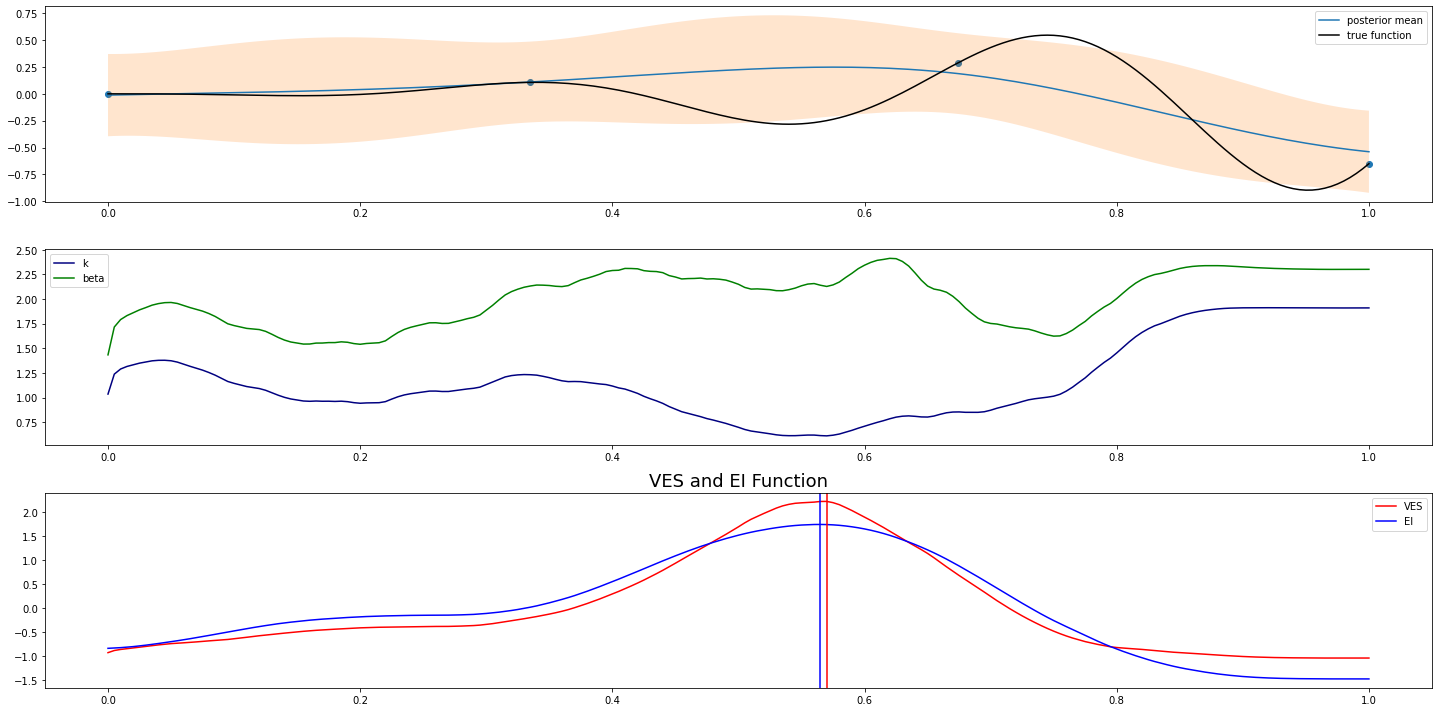

In [8]:
fig = plot_ves(model, train_X, train_Y, f)
plt.show()